<a href="https://colab.research.google.com/github/patlewig/aim/blob/master/notebooks/AIM_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AIM Benchmark

Compare the original AIM file fingerprints from database to the newly developed CSRML fingerprints.


#### QAPP ID: I-CCED-0032994-QP-1-0
#### Author: Matthew Adams
#### Principal Investigator: Grace Patlewicz
#### Last Modified May 05 2022

In [1]:
import pandas as pd

In [139]:
# Load the original AIM Fragment database And choose dataset of interest (E.g. First 5000 labelled structures)

df = pd.read_csv("aimdb.tsv", sep='\t', names = ['SMILES', 'CASRN', 'othwer', 'other', 'AIM Fragments'])
df_aim = df[['SMILES','CASRN', 'AIM Fragments']]
df_aim['AIM_list'] = df_aim['AIM Fragments'].apply(lambda x: x.split(','))

df_aim = df_aim[0:5000]

df_aim.to_csv('AIM_list_5000_.csv')
#df_aim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [141]:
# Create a list of the CRSML Chemotypes from the fingerprint file generated in Chemotyper 
# (Chemotyper Inputs: Chemotype set file: AIM_V_1.xml, Structures: first_5000.sdf) --> Chemotyper Output: AIM_vs_first_5000.csv

df_chemo = pd.read_csv("AIM_V1_vs_fooba_5032.csv")
df_chemo = df_chemo.rename(columns={'M_SMILES':'SMILES'})
df_chemo['Chemo_list'] = df_chemo.apply(lambda x: x.index[x == 1].tolist(), axis=1)
df_chemo = df_chemo[['SMILES','Chemo_list']]
df_chemo


df_join = pd.merge(df_chemo,df_aim,on='SMILES',how='inner')
df_join = df_join[['CASRN','SMILES','AIM_list', 'Chemo_list']]
df_join = df_join.drop_duplicates(subset=['SMILES'])
#df_join.to_csv('AIM_ChemoType_Bench_first600.csv')

#df_join

In [142]:
d = []
for row in df_join.itertuples():
    #combined = row.AIM_list+row.Chemo_list
    combined_uniques = list(set(row.AIM_list).symmetric_difference(set(row.Chemo_list)))
    #combined_uniques = (set(combined))
    d.append(combined_uniques)



df_join['Difference'] = d
#mask = df_join['AIM_list'].apply(lambda x: '5' in x)  #optional filter
#df_join = df_join[mask]       #Optional filter


df_join.to_excel('benchmark_smiles_aim_2_16_22_.xlsx')



# Exceptions due to multiple subgraph representation for a single feature, duplicate entries, or uncaught exceptions
exceptions = ['91C','91C_a','200C','200C_a','123C', '123C_a', '12','12_a','3_a','3','137', 
              '146', '96E', '328C', '306C', '66E', '67E', '90E', '100C', '100Ca', '13C', 
              '13C_a','13C_b','13C_c','13C_d','13C_e', '13C_f', '13C_g','13C_h', '8', 
              '8_a', '8_b', '82C_a', '82C','183C', '183C_a', '171','171_a', '216', '216_a',
              '2', '86C', '99C', '99C_a', '25', '30', '14C','14C_a', '40', '251C', '24_a', 
              '34C', '34C_a', '35C', '35C_a', '101X', '106C_a', '157C', '157C_a', '157C_b', 
              '101C', '101C_a','106C', '106C_a', '106C_b', '23C', '62E', '7C', '7C_a', '7C_b', 
              '121', '164','26C','26C_a','26C_b','26C_c','26C_d', '191C', '191C_a', '107C_a', 
              '107C_b', '107C', '40C', '74E', '69E', '88E', '77E', '68E', '65E', '75E', '145']

for e in exceptions:
  df_join['Difference'] = df_join.Difference.apply(lambda x: [i for i in x if i != e])


df_mismatch = df_join[df_join['Difference'].map(lambda d: len(d)) > 0]

full_match = round(1 -(len(df_mismatch)/len(df_join)),4)

#print(df_mismatch)

print('Percent full match: ' + str(100*full_match) + '%')

df_join

Percent full match: 92.81%


,CASRN,SMILES,AIM_list,Chemo_list,Difference
0,51218,N1C(=O)NC(=O)C(F)=C1,"[5, 10, 15, 43, 58, 172, 174, 176, 206, 210, 3C]","[5, 10, 15, 43, 58, 172, 174, 176, 206, 210, 3C]",[]
1,51285,N(=O)(=O)c(ccc(O)c1N(=O)(=O))c1,"[19, 23, 34, 13C]","[19, 23, 34, 13C, 13C_b]",[]
2,51296,Clc1c(Cl)cc(C(O)CNC(C)C)cc1,"[0, 1, 2, 7, 10, 19, 21, 214, 90C]","[0, 1, 2, 7, 10, 19, 21, 214, 90C]",[]
3,51343,CN1C2CC(CC1C3OC23)OC(=O)C(CO)c4ccccc4,"[0, 1, 2, 7, 8, 11, 19, 40, 171, 173, 174, 82C]","[0, 1, 2, 7, 8, 11, 19, 40, 171, 173, 174, 82C]",[]
4,51354,O=C(O)C(NCC1O)C1,"[1, 2, 7, 10, 35, 171, 174, 6C, 7C]","[1, 2, 7, 10, 35, 171, 174, 7C_a, 7C_b]",[6C]
...,...,...,...,...,...
4745,426131,CC1CC2C3CCC(O)(C(=O)C)C3(C)CC(O)C2(F)C4(C)C=CC...,"[0, 1, 2, 5, 7, 14, 29, 76, 92, 171, 172, 176,...","[0, 1, 2, 5, 7, 14, 29, 76, 92, 171, 172, 176,...",[]
4746,427009,c(cc(c1C2(CC3)C4C5)CC4N3C)c(O)c1OC2CC5,"[0, 1, 2, 11, 19, 23, 25, 76, 171, 173, 174, 8...","[0, 1, 2, 11, 19, 23, 25, 76, 171, 173, 174, 8...",[]
4747,427510,C12(C)CCC3C4(C)C5CC5C(=O)C=C4C=CC3C1CCC2(C(=O)C)O,"[0, 1, 2, 5, 7, 29, 76, 92, 171, 172, 176, 82C...","[0, 1, 2, 5, 7, 29, 76, 92, 171, 172, 176, 82C...",[]
4748,428375,N1(C)CC(CCC)(c2cc(O)ccc2)CC1,"[0, 1, 11, 19, 23, 76, 171, 174, 90C]","[0, 1, 11, 19, 23, 76, 171, 174, 90C]",[]


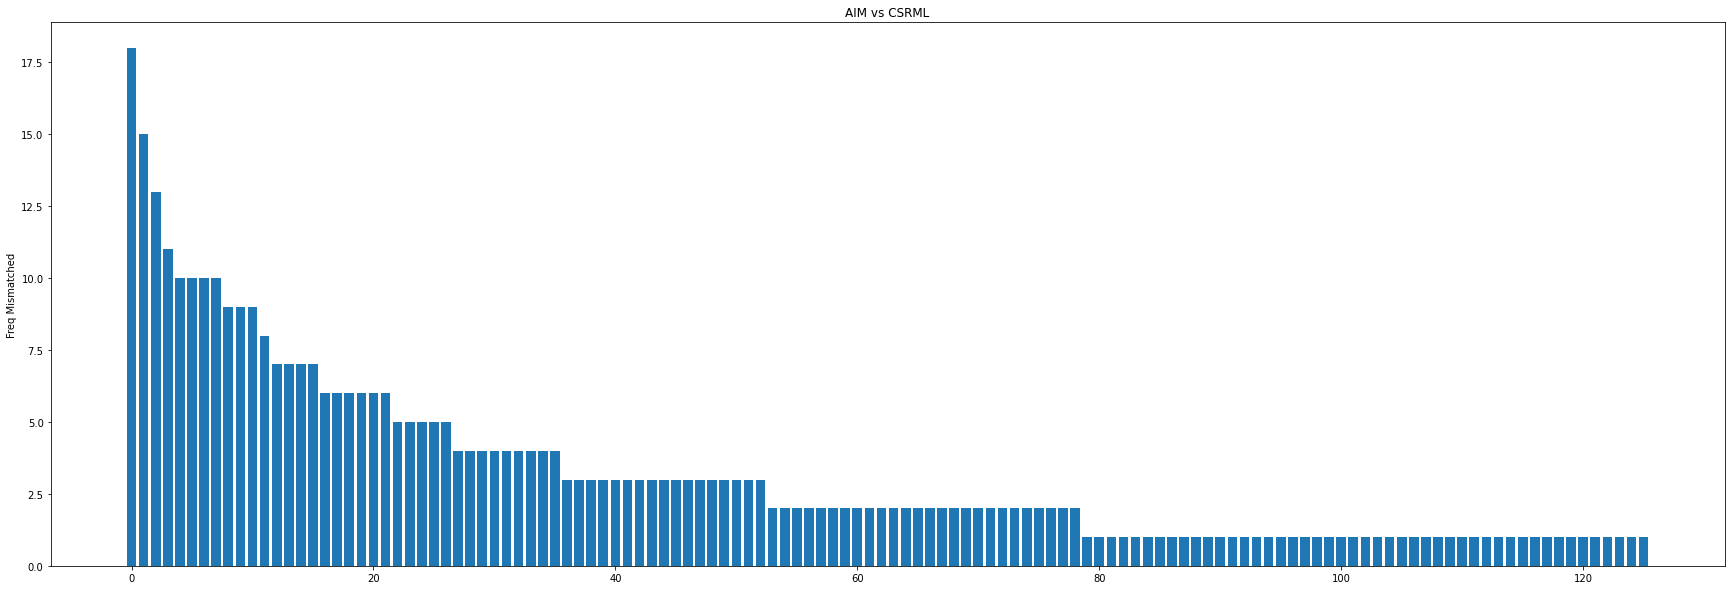

In [143]:
import matplotlib.pyplot as plt
import numpy as np
diff = []
for row in df_join["Difference"]:
  for fragment in row:
    diff.append(fragment)

import collections
diff_counter = collections.Counter(diff)
diff_counter = dict(sorted(diff_counter.items(), key=lambda item: -item[1]))
# Descending order

for k in exceptions:
    diff_counter.pop(k, None)

keys = diff_counter.keys()
#print(keys)

key_len = np.arange(len(keys))
values = diff_counter.values()

plt.figure(figsize=(30, 10))
plt.bar(key_len,values)
plt.ylabel('Freq Mismatched')
plt.title('AIM vs CSRML')
#plt.xticks(key_len, keys)
plt.show()
#print(diff_counter)

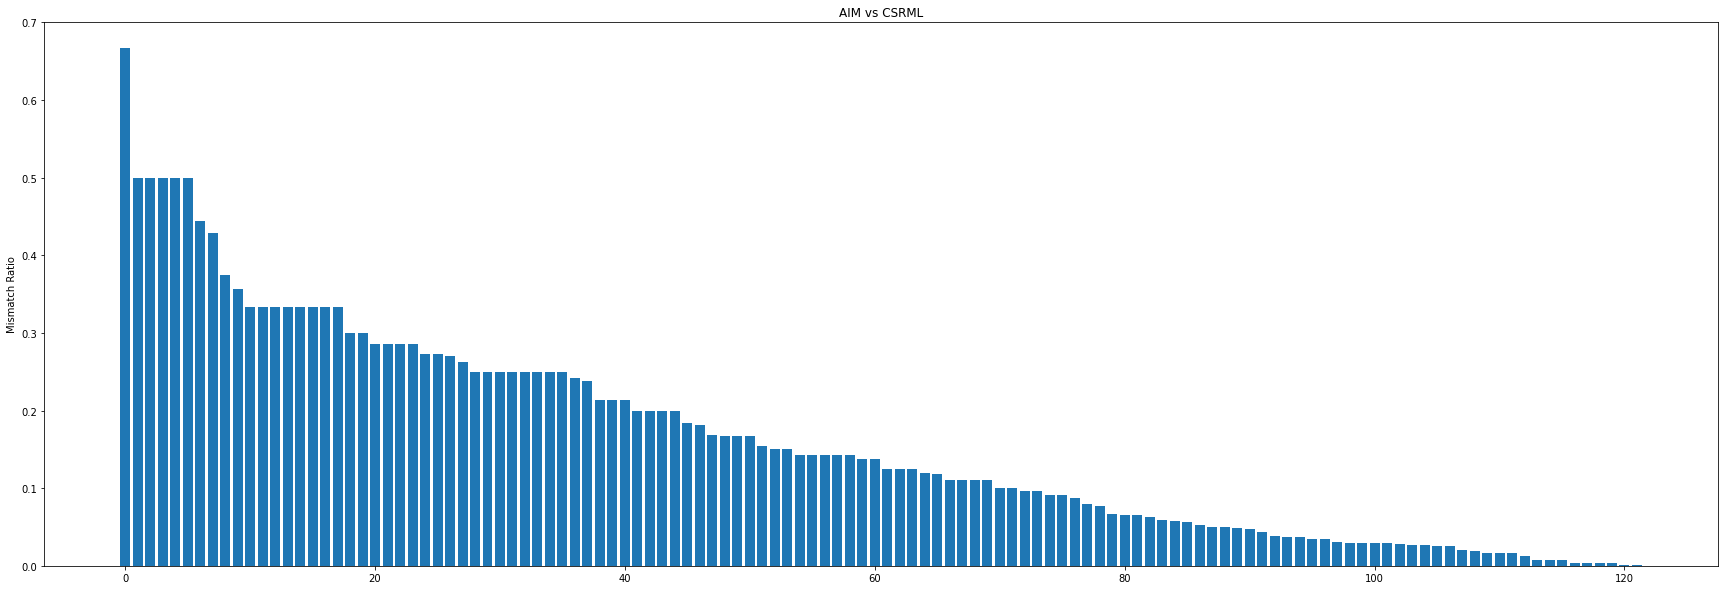

{'236C': 0.667, '23X': 0.5, '90X': 0.5, '18X': 0.5, '31X': 0.5, '218C': 0.5, '59': 0.444, '87C': 0.429, '19C': 0.375, '181C': 0.357, '52C': 0.333, '158C': 0.333, '90': 0.333, '18C': 0.333, '126C': 0.333, '10C': 0.333, '141': 0.333, '86': 0.333, '213': 0.3, '274C': 0.3, '166C': 0.286, '12C': 0.286, '131C': 0.286, '96C': 0.286, '108C': 0.273, '84C': 0.273, '305C': 0.27, '51X': 0.263, '82': 0.25, '179C': 0.25, '227C': 0.25, '33C': 0.25, '69C': 0.25, '47C': 0.25, '122': 0.25, '209C': 0.25, '6C': 0.242, '95C': 0.238, '5C': 0.214, '49C': 0.214, '61C': 0.214, '21C': 0.2, '120C': 0.2, '168C': 0.2, '53X': 0.2, '3C': 0.184, '124C': 0.182, '31': 0.169, '32C': 0.167, '85C': 0.167, '98': 0.167, '38': 0.154, '99': 0.15, '190C': 0.15, '151C': 0.143, '115C': 0.143, '48X': 0.143, '205C': 0.143, '226': 0.143, '36E': 0.138, '228': 0.138, '56C': 0.125, '315C': 0.125, '220C': 0.125, '211': 0.12, '103': 0.118, '118': 0.111, '111C': 0.111, '140': 0.111, '34E': 0.111, '107': 0.1, '27E': 0.1, '22C': 0.097, '9C

In [144]:
## mismatches / presence_in_list

def col_to_list(col):
    col_list = []
    for row in df_join[col]:
    for fragment in row:
        col_list.append(fragment)
    return col_list

AIM = col_to_list('AIM_list')
counter_aim = collections.Counter(AIM)
AIM_count = dict(counter_aim)
#print(AIM_count['269C'])

diff = col_to_list('Difference')
counter_diff = collections.Counter(diff)
diff_count = dict(counter_diff)
#print(diff_count['269C'])


fraction_mismatched = {k: round(diff_count[k] / float(AIM_count[k]),3) for k in diff_count if k in AIM_count}
fraction_sorted = dict(sorted(fraction_mismatched.items(), key=lambda item: -item[1]))
#print(fraction_mismatched)

#121, 164 - both Nitroso, N+5 Valence

for k in exceptions:
    fraction_sorted.pop(k, None)

keys = fraction_sorted.keys()

key_len = np.arange(len(keys))
values = fraction_sorted.values()

plt.figure(figsize=(30, 10))
plt.bar(key_len,values)
plt.ylabel('Mismatch Ratio')
plt.title('AIM vs CSRML')
#plt.xticks(key_len, keys)
plt.show()

print(fraction_sorted)  


In [145]:
fragments = []
for row in df_join["Difference"]:
  for fragment in row:
    fragments.append(fragment)
  #print(df_benchmark["Organic functional groups (US EPA)"][row])
  
i = list(set(fragments)) #list of unique fragments
duplicates = ['137', '146', '96E', '328C', '306C', '66E', '67E', '90E']


#maybe some AIM wrong: 3, 8, 23C, 76, 2, 124C, 216, 29
#aim_error = ['1','2','3','8', '20','29','211', '12','174', '76','175', '101X',
#             '99','5C','14C','191C','40C', '181C', '84', '191C', '62E', '121', 
#             '178', '43', '25', '151C', '155C', '82C']  # maybe 121; CAS 69749, 61734,75172, 50760, 58253 is wrong on AIM, (weird aromatic)




final_list = list(set(i) - set(duplicates)- set(exceptions))
print("Mismatches:", len(final_list))   # Length of list (# unique different fragments)



Mismatches: 126


In [146]:
# May Take a few minutes to run
df_join
fragments = []
for row in df_join["Difference"]:  #Possibly switch to Difference columns in case the CSRML matches with fragments that do not show up at all within the dataset for AIM
  for fragment in row:
    fragments.append(fragment)

#print(fragments)

diffs = []

for i in fragments:
  selection = [i]
  aim_mask = df_join['AIM_list'].apply(lambda x: any(item for item in selection if item in x))
  df_aim = df_join[aim_mask]
  aim_total = df_aim.shape[0]
  
  mask = df_join['Difference'].apply(lambda x: any(item for item in selection if item in x))

  df_diff = df_join[mask]

  diff_total = df_diff.shape[0]

  chemo_mask = df_diff['Chemo_list'].apply(lambda x: any(item for item in selection if item in x))

  diff_chemo = df_diff[chemo_mask].shape[0]
  diff_aim = diff_total - diff_chemo
  diffs.append([aim_total,diff_total,diff_chemo,diff_aim])

#print(diffs)

In [147]:
# Create a dictionary using the above data
diffs_dict = dict(zip(fragments,diffs))
diffs_dict = {key:val for key, val in diffs_dict.items() if val[1] != 0}  #Get rid of ones with no total diffs


# [TOTAL Original AIM, TOTAL MISMATCH, AIM MISSING, CSRML MISSING]

# TOTAL Original - Number of times feature detected in original AIM labelled structures
# TOTAL MISMATCH - When presence of feature in only one set
#AIM MISSING -- means that the CSRML version is matching with structures which do NOT contain the AIM fragment it is trying to represent (Underspecification)
#CSRML MISSING -- means that the CSRML version is NOT matching with structures which do contain the AIM fragment it is trying to represent (Overspecification)



for k in exceptions:
    diffs_dict.pop(k, None)

In [148]:
df_diff = pd.DataFrame.from_dict(diffs_dict).T
df_diff = df_diff.rename(columns={df_diff.columns[0]:'AIM Original Total',df_diff.columns[1]:'Total Mismatches',df_diff.columns[2]:'Original AIM Missing',df_diff.columns[3]:'CSRML Missing'})

df_diff['Fraction Mismatches'] = np.round(df_diff['Total Mismatches']/df_diff['AIM Original Total'],4)

df_diff.to_excel('Mismatch_table.xlsx')
df_diff.sort_values(by=['Fraction Mismatches'], ascending=False)
#print(list(df_diff['Fraction Mismatches']))



,AIM Original Total,Total Mismatches,Original AIM Missing,CSRML Missing,Fraction Mismatches
43X,0,1,1,0,inf
45X,0,1,1,0,inf
273C,0,2,2,0,inf
263C,0,2,2,0,inf
236C,3,2,0,2,0.6667
...,...,...,...,...,...
76,571,2,2,0,0.0035
9,328,1,0,1,0.0030
173,335,1,0,1,0.0030
19,2426,2,1,1,0.0008


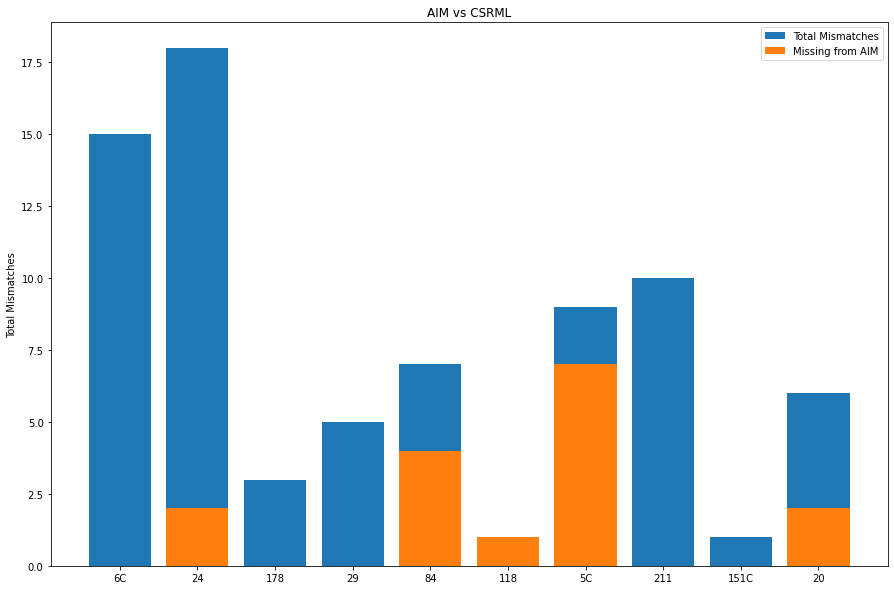

In [149]:
keys = diffs_dict.keys()

key_len = np.arange(len(keys))

n = 10
first_n_pairs = {k: diffs_dict[k] for k in list(diffs_dict)[:n]}

keys = first_n_pairs.keys()

key_len = np.arange(len(keys))


values = list(first_n_pairs.values())
values_0 = [item[1] for item in values]
values_1 = [item[2] for item in values]
values_2 = [item[3] for item in values]


plt.figure(figsize=(15, 10))
plt.bar(key_len, values_0, label='Total Mismatches')
plt.bar(key_len, values_1, label='Missing from AIM')

plt.ylabel('Total Mismatches')
plt.title('AIM vs CSRML')
plt.legend()
plt.xticks(key_len, keys)
plt.show()
